# week 7 Seminar Questions 

In [5]:
import numpy as np
import pandas as pd
import os
#using os we don't need to use %d for percentages 

 BINOMIAL TREES 


QUESTION 1 

In [6]:

# 5 imputs for European Call Option 

S0 = 10                 # spot stock price
K = 11                  # strike
T = 0.25                # maturity 
r = 0.04                # risk free rate 
sigma = 0.25            # volatility (diffusion coefficient), we calibrate volatility, not extimate
N = 5                   # number of time steps (number of periods)
payoff = "call"         # payoff

#after we run it, Python record the data 


In [7]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor

In [8]:
# we start to create the tree 



In [9]:

S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [11]:
S

array([[10.        , 10.57493726, 11.18292981, 11.82587812, 12.50579192,
        13.2247965 ],
       [ 0.        ,  9.45632087, 10.        , 10.57493726, 11.18292981,
        11.82587812],
       [ 0.        ,  0.        ,  8.94220045,  9.45632087, 10.        ,
        10.57493726],
       [ 0.        ,  0.        ,  0.        ,  8.45603168,  8.94220045,
         9.45632087],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  7.99629489,
         8.45603168],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         7.56155303]])

In [12]:
# the results is 6 values because it is a 5 time steps tree

In [13]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5039253348587126

In [14]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))  

#create a loop 

if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

#we only have 2 values 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        2.2247965 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.82587812],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [15]:

# CODE for European Option
# create a loop inside the loop 
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.20236186, 0.35036502, 0.59324718, 0.97397638, 1.52776994,
        2.2247965 ],
       [0.        , 0.05283313, 0.10505308, 0.20888688, 0.41534938,
        0.82587812],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [17]:
print('European ' + payoff + ' is', str( V[0,0]))

European call is 0.2023618622711507


QUESTION 2

Same tree as before, we just need to change the payoff from call to put

In [18]:
payoff = "put"

In [19]:

S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42506274],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.54367913],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.54396832],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.43844697]])

In [20]:
# CODE for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[1.09291003, 0.68777882, 0.34451497, 0.10418614, 0.        ,
        0.        ],
       [0.        , 1.50886332, 1.03925068, 0.5900375 , 0.21044155,
        0.        ],
       [0.        , 0.        , 1.99199716, 1.49976701, 0.97802199,
        0.42506274],
       [0.        , 0.        , 0.        , 2.50005621, 2.03582154,
        1.54367913],
       [0.        , 0.        , 0.        , 0.        , 2.9817271 ,
        2.54396832],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.43844697]])

In [22]:
print('European ' + payoff + ' is', str( V[0,0]))

European put is 1.0929100335119963


QUESTION 3 

Use American Option, using the same data as before. 

American option can be more expensive than european, because it happens before. 

In [24]:
# CODE for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[1.12395227, 0.70396044, 0.34990195, 0.10418614, 0.        ,
        0.        ],
       [0.        , 1.55512662, 1.06646308, 0.60091845, 0.21044155,
        0.        ],
       [0.        , 0.        , 2.05779955, 1.54367913, 1.        ,
        0.42506274],
       [0.        , 0.        , 0.        , 2.54396832, 2.05779955,
        1.54367913],
       [0.        , 0.        , 0.        , 0.        , 3.00370511,
        2.54396832],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.43844697]])

In [26]:
print('American ' + payoff + ' is', str( V[0,0]))

American put is 1.1239522660139594


indeed, American Option IS MORE EXPENSIVE. 

QUESTION 4 

Montecarlo simulation on 1 call 

In [29]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation

    #n = 10000 times for the asset price with M = 90 steps
    
    M = m
    I = n
    
# Define the variables 

    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [28]:
S = mcs_simulation_np(90,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

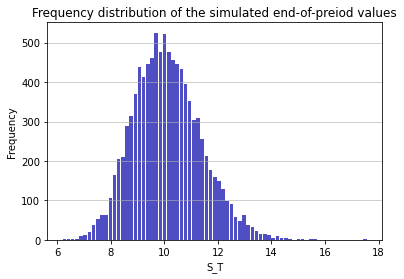

In [31]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

QUESTION 5 

European Call 

In [35]:
p = np.mean(np.maximum(S[-1,:] - K,0))
print('European call', str(p))

#this will cause a large error because the time frame is too small 

European call 0.1961404628611193


QUESTION 6

Binary Call 

In [38]:
cp = (S[-1,:]  - K)>0 #Boolean, we add >0 to set up a boolean to check the value is true, then it change to an antigen
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Binary call', str(bpc))

Binary call 0.2281


Binary option for Put

In [39]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.7719


Binary Put-Call parity

In [41]:
bpc + bpp


1.0